# Feature Engineering

Nesse notebook, a partir do que foi visualizado na EDA vamos construir variáveis que trazem maior informação dos padrões nos nossos dados.

## 1 - Leitura dos dados

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from typing import Union

In [2]:
df = pd.read_csv("../data/raw/customer_churn_data - customer_churn_data.csv",decimal=",")
print("DataFrame shape: ",df.shape)
df.head()

DataFrame shape:  (7043, 22)


,ID,Tipo de empresa,Fundação da empresa,Possui mais de um sócio,Funcionários,Meses de permanência,Utiliza serviços financeiros,PossuiContador,Faz conciliação bancária,Frequência de utilização de feature do sistema: Módulo financeiro,...,Frequência de utilização de feature do sistema: Módulo de vendas,Frequência de utilização de feature do sistema: Relatórios,Frequência de utilização de feature do sistema: Utilização de APIs de integração,Contrato,Emite boletos,Emite boletos.1,Tipo de pagamento,Receita mensal,Receita total,Churn
0,1,Micro empresa,2016,Sim,até 5 funcionários,1,Não,NaN,automática,Pouco uso,...,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,"R$ 29,85","R$ 29,85",Não
1,2,Pequena empresa,2018,Não,até 5 funcionários,34,Sim,Não,automática,Uso frequente,...,Pouco uso,Pouco uso,Pouco uso,Trimestral,0,No,Boleto - mês a mês,"R$ 56,95","R$ 1.889,50",Não
2,3,Pequena empresa,2021,Não,até 5 funcionários,2,Sim,Não,automática,Uso frequente,...,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - mês a mês,"R$ 53,85","R$ 108,15",Sim
3,4,Pequena empresa,2016,Não,até 5 funcionários,45,Não,NaN,automática,Uso frequente,...,Uso frequente,Pouco uso,Pouco uso,Trimestral,0,No,Cartão de crédito - pagamento único,"R$ 42,30","R$ 1.840,75",Não
4,5,Micro empresa,2017,Não,até 5 funcionários,2,Sim,Não,manual,Pouco uso,...,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,"R$ 70,70","R$ 151,65",Sim


## 2 - Limpando dados

In [3]:
def clear_numeric_strings(dataframe:pd.DataFrame,subset=Union[str,list]):
    new_df = dataframe.copy()
    if isinstance(subset,str):
        new_df[subset] = new_df[subset].str.replace(pat=r"([R$])|([.])",repl="",regex=True)\
                                               .str.strip()\
                                               .str.replace(pat=",",repl=".")
    else:
        new_df[subset] = new_df[subset].apply(
            func=lambda s: s.str.replace(pat=r"([R$])|([.])",repl="",regex=True)\
                                               .str.strip()\
                                               .str.replace(pat=",",repl="."),
            axis=1,
        )
    return new_df
        
def convert_to_numeric(dataframe:pd.DataFrame,subset:Union[str,list]):
    new_df = dataframe.copy()
    new_df[subset]=new_df[subset].astype("float")
    return new_df


conv_cols = ["Receita mensal","Receita total"]
df = clear_numeric_strings(dataframe=df,subset=conv_cols)
df = convert_to_numeric(dataframe=df,subset=conv_cols)
df = df.drop("Emite boletos",axis=1)
df.head()

,ID,Tipo de empresa,Fundação da empresa,Possui mais de um sócio,Funcionários,Meses de permanência,Utiliza serviços financeiros,PossuiContador,Faz conciliação bancária,Frequência de utilização de feature do sistema: Módulo financeiro,...,Frequência de utilização de feature do sistema: Integração bancária,Frequência de utilização de feature do sistema: Módulo de vendas,Frequência de utilização de feature do sistema: Relatórios,Frequência de utilização de feature do sistema: Utilização de APIs de integração,Contrato,Emite boletos.1,Tipo de pagamento,Receita mensal,Receita total,Churn
0,1,Micro empresa,2016,Sim,até 5 funcionários,1,Não,NaN,automática,Pouco uso,...,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,Yes,Boleto - pagamento único,29.85,29.85,Não
1,2,Pequena empresa,2018,Não,até 5 funcionários,34,Sim,Não,automática,Uso frequente,...,Uso frequente,Pouco uso,Pouco uso,Pouco uso,Trimestral,No,Boleto - mês a mês,56.95,1889.50,Não
2,3,Pequena empresa,2021,Não,até 5 funcionários,2,Sim,Não,automática,Uso frequente,...,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,Yes,Boleto - mês a mês,53.85,108.15,Sim
3,4,Pequena empresa,2016,Não,até 5 funcionários,45,Não,NaN,automática,Uso frequente,...,Uso frequente,Uso frequente,Pouco uso,Pouco uso,Trimestral,No,Cartão de crédito - pagamento único,42.30,1840.75,Não
4,5,Micro empresa,2017,Não,até 5 funcionários,2,Sim,Não,manual,Pouco uso,...,Pouco uso,Pouco uso,Pouco uso,Pouco uso,Mês-a-mês,Yes,Boleto - pagamento único,70.70,151.65,Sim


In [4]:
def convert_to_categoric(dataframe:pd.DataFrame,subset:Union[str,list]):
    new_df = dataframe.copy()
    new_df[subset]=new_df[subset].astype("category")
    return new_df

cat_columns = list(df.select_dtypes(include="object",exclude=["float64","int64"]).columns)
df = convert_to_categoric(dataframe=df,subset=cat_columns)
df.dtypes

ID                                                                                     int64
Tipo de empresa                                                                     category
Fundação da empresa                                                                    int64
Possui mais de um sócio                                                             category
Funcionários                                                                        category
Meses de permanência                                                                   int64
Utiliza serviços financeiros                                                        category
PossuiContador                                                                      category
Faz conciliação bancária                                                            category
Frequência de utilização de feature do sistema: Módulo financeiro                   category
Frequência de utilização de feature do sistema: Emissão de nota fiscal

## 3 - Construindo features numéricas

As variáveis númericas apresentam dados mais dispersos, uma forma de ter uma melhor informação desses valores é os associando em categorias. 

Vamos visualizar isso com a feature `Meses de permanência`

In [5]:
def classify_col(dataframe:pd.DataFrame,col_to_clf:str,new_col_name:str,map:dict):
    new_df = df.copy()
    new_df[new_col_name]=np.nan
    for cat,range in map.items():
        values = dataframe[col_to_clf].isin(range)
        new_df[new_col_name]=new_df[new_col_name].mask(values,cat)
    return new_df

In [6]:
map_temp_perm = {
    "Menor que 3 meses":range(0,3),
    "Entre 3 a 12 meses":range(3,12),
    "Entre 12 a 36 meses":range(12,36),
    "Maior que 36 meses":range(36,100),
}

df = classify_col(dataframe=df,col_to_clf="Meses de permanência ",new_col_name="cat_meses_perm",map=map_temp_perm)
df["cat_meses_perm"].value_counts()

cat_meses_perm
Maior que 36 meses     3051
Entre 12 a 36 meses    1923
Entre 3 a 12 meses     1207
Menor que 3 meses       862
Name: count, dtype: int64

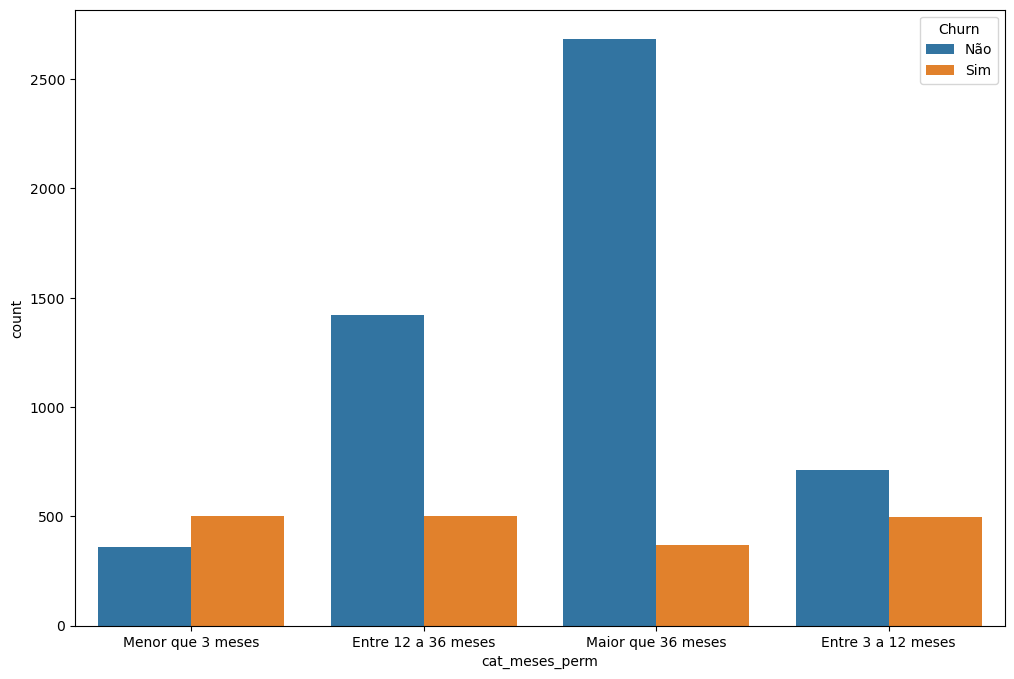

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=df,x="cat_meses_perm",hue="Churn",ax=ax);

Visualizando esse gráfico podemos perceber que quanto maior o tempo de permanência maior é a fidelidade do cliente e menor a probabilidade de churn.

Uma outra informação que esse gráfico pode trazer é a variação da receita mensal conforme o tempo de permanência varia. Vamos visualizar isso no boxplot abaixo e também verificar qual a distribuição da receita mensal

,Receita mensal
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


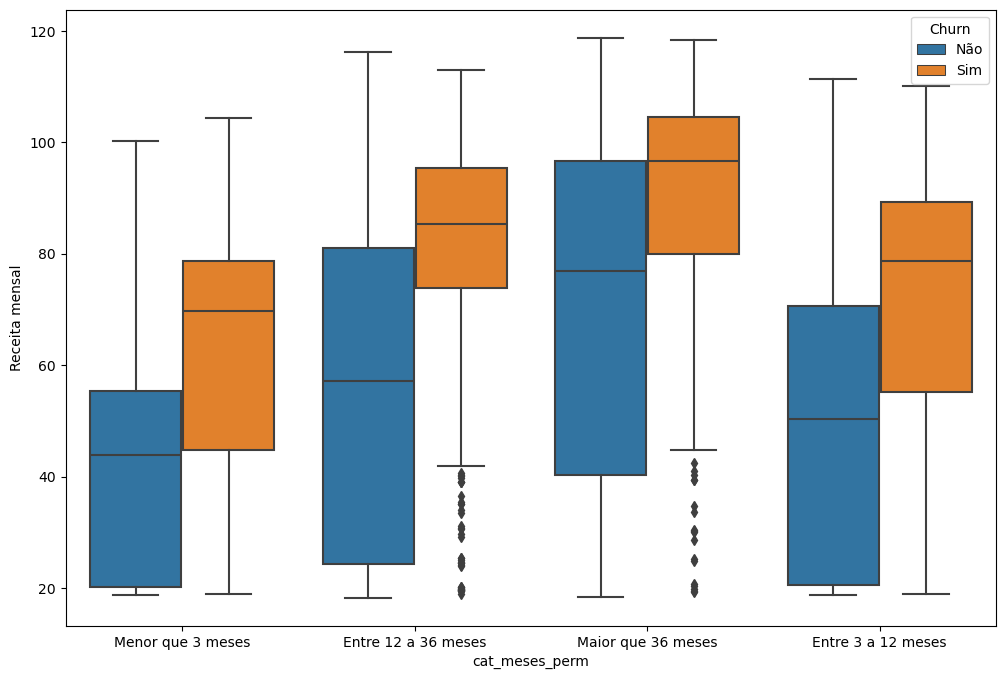

In [8]:
fig,ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=df,x="cat_meses_perm",y="Receita mensal",hue="Churn",ax=ax);
df[["Receita mensal"]].describe()

Podemos observar que empresas que fazem o Churn tendem a ter mais receita mensal e inclusive maior que 70.0 até nos primeiros meses, contudo, lembre-se que empresas com menor tempo de permância tem maior tendência a sair. Logo, será que quem tem receita mensal maior que 70.0 nos primeiros meses tende a sair?

% de empresas com renda maior ou igual a 70.0: 50.98679539968764


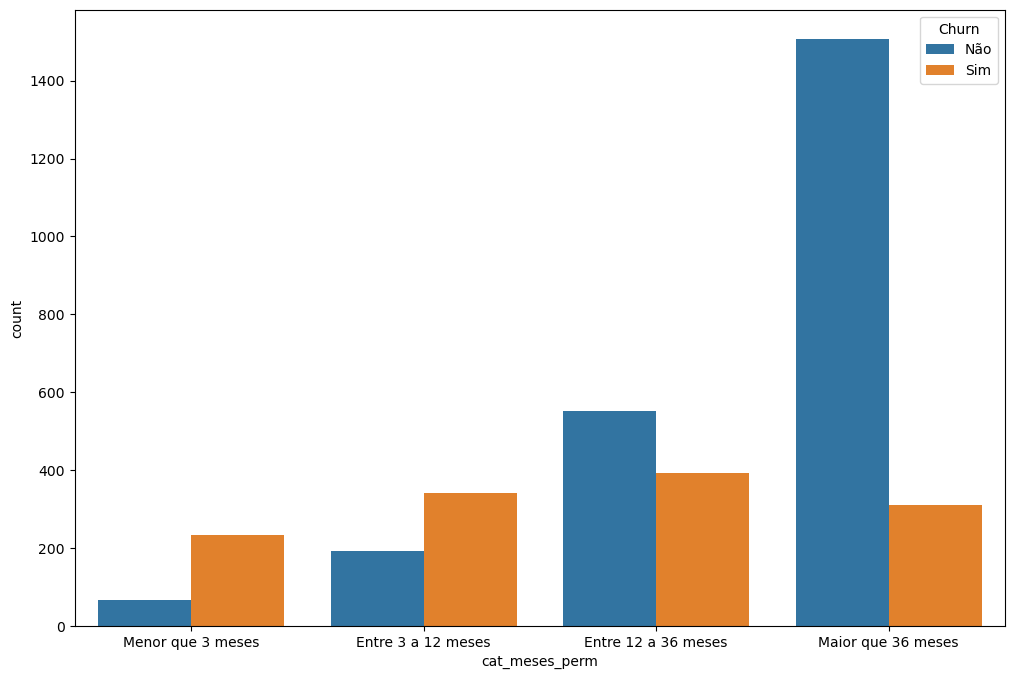

In [9]:
fig,ax = plt.subplots(figsize=(12,8))
print("% de empresas com renda maior ou igual a 70.0:",(df[df["Receita mensal"]>=70.0].shape[0]/df.shape[0])*100.0)
sns.countplot(data=df[df["Receita mensal"]>=70.0],x="cat_meses_perm",hue="Churn",ax=ax);

Pelo gráfico acima, percebemos que empresas com receita maior ou igual a 70.0 correspondem a praticamente 51% dos valores e dentro disso quem tem esse valor a menos de 1 ano tem maior tendência ao churn. Isso o torna um dado importante que podemos acrescentar como uma feature.

In [10]:
df["is_receita_mensal_maior_ou_igual_70"] = df["Receita mensal"].gt(70.0)|df["Receita mensal"].eq(70.0)

Por fim, vimos pelo notebook da EDA que Receita total possui valores nulos, vamos investigar porque isso acontece.

In [11]:
df[df["Receita total"].isnull()]

,ID,Tipo de empresa,Fundação da empresa,Possui mais de um sócio,Funcionários,Meses de permanência,Utiliza serviços financeiros,PossuiContador,Faz conciliação bancária,Frequência de utilização de feature do sistema: Módulo financeiro,...,Frequência de utilização de feature do sistema: Relatórios,Frequência de utilização de feature do sistema: Utilização de APIs de integração,Contrato,Emite boletos.1,Tipo de pagamento,Receita mensal,Receita total,Churn,cat_meses_perm,is_receita_mensal_maior_ou_igual_70
488,489,Micro empresa,2019,Sim,6 ou mais funcionários,0,Não,NaN,automática,Uso frequente,...,Uso frequente,Pouco uso,Anual,Yes,Cartão de crédito - pagamento único,52.55,NaN,Não,Menor que 3 meses,False
753,754,Pequena empresa,2019,Não,6 ou mais funcionários,0,Sim,Não,não faz,Nunca utilizou,...,Nunca utilizou,Nunca utilizou,Anual,No,Boleto - mês a mês,20.25,NaN,Não,Menor que 3 meses,False
936,937,Micro empresa,2020,Sim,6 ou mais funcionários,0,Sim,Não,automática,Uso frequente,...,Uso frequente,Uso frequente,Anual,No,Boleto - mês a mês,80.85,NaN,Não,Menor que 3 meses,True
1082,1083,Pequena empresa,2020,Sim,6 ou mais funcionários,0,Sim,Sim,não faz,Nunca utilizou,...,Nunca utilizou,Nunca utilizou,Anual,No,Boleto - mês a mês,25.75,NaN,Não,Menor que 3 meses,False
1340,1341,Micro empresa,2019,Sim,6 ou mais funcionários,0,Não,NaN,automática,Uso frequente,...,Uso frequente,Pouco uso,Anual,No,Cartão de crédito - mês a mês,56.05,NaN,Não,Menor que 3 meses,False
3331,3332,Pequena empresa,2016,Sim,6 ou mais funcionários,0,Sim,Não,não faz,Nunca utilizou,...,Nunca utilizou,Nunca utilizou,Anual,No,Boleto - mês a mês,19.85,NaN,Não,Menor que 3 meses,False
3826,3827,Pequena empresa,2016,Sim,6 ou mais funcionários,0,Sim,Sim,não faz,Nunca utilizou,...,Nunca utilizou,Nunca utilizou,Anual,No,Boleto - mês a mês,25.35,NaN,Não,Menor que 3 meses,False
4380,4381,Micro empresa,2017,Sim,6 ou mais funcionários,0,Sim,Não,não faz,Nunca utilizou,...,Nunca utilizou,Nunca utilizou,Anual,No,Boleto - mês a mês,20.00,NaN,Não,Menor que 3 meses,False
5218,5219,Pequena empresa,2018,Sim,6 ou mais funcionários,0,Sim,Não,não faz,Nunca utilizou,...,Nunca utilizou,Nunca utilizou,Trimestral,Yes,Boleto - mês a mês,19.70,NaN,Não,Menor que 3 meses,False
6670,6671,Micro empresa,2016,Sim,6 ou mais funcionários,0,Sim,Sim,automática,Pouco uso,...,Uso frequente,Pouco uso,Anual,No,Boleto - mês a mês,73.35,NaN,Não,Menor que 3 meses,True


Veja que `Receita total` possui valor nulo quando a empresa está no Mês de permanância 0 podemos substituir seu valor pela mediana dos dados, contudo, é interessante para o modelo informar que esse valor não está presente, nesse caso, ele consegue ter mais contexto, entendendo que aquele dado pertence ao mês 0

In [12]:
df["is_Receitatotal_null"] = df["Receita total"].isnull()
df[df["is_Receitatotal_null"]==True].shape[0]

11

## 4 - Arrumando features categóricas

Conforme vimos na EDA, as features categóricas apresentam informações importantes a respeito do Churn. Contudo, a feature `PossuiContador` possui uma grande quantidade de valores nulos, quase próximo de 10% do total. No modelo, é necessário substituir por um valor, contudo, para sinalizar que essa variável é nula, podemos contruir uma variavel booleana indicando a falta dessa informação

In [13]:
df["is_PossuiContador_null"] = df["PossuiContador"].isnull()
df[df["is_PossuiContador_null"]==True].shape[0]

682

## Conclusão

- Conseguimos construir quatro novas features: `cat_meses_perm` que coloca os valores de `Meses permanância` em categorias, `is_receita_mensal_maior_ou_igual_70` que verifica se a `receita mensal` é maior ou 70 e `is_PossuiContador_null` e `is_ReceitaTotal_null` que indica a falta desses valores.
- As variáveis categóricas estão com boa qualidade e também são importantes para distinguir quem faz ou não o Churn, prinicpalmente, quando consideradas em conjunto com as variáveis numéricas.
- As variáveis numéricas apesar de poucas ilustram bons padrões nos dados. A feature `Meses de permanância` quando categorizada consegue resumir bem a informação que quanto maior esse valor menor é a chance de Churn, além disso, pelos nossos dados vimos que quem tem `Receita mensal` acima de 70.0 nos três primeiros meses apresenta maior chance de Churn.
- Para o modelo podemos tratar os dados faltantes a partir de inserção de valores mas também é importante sinalizar sua falta assim o modelo consegue ter maior contexto dessa informação.